In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('../Datasets/Corazon/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
def describe(df):                        # Funcion para explorar los elementos del dataset
                                         # Ayudará para encontrar valores nulos
    columns=df.columns.to_list()         # Además ayudará a encontrar columnas object y columnas int
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('Name of all columns in the dataframe:')
    print(columns)
    print('')
    print('Number of columns in the dataframe:')
    print(len(columns))
    print('')
    print('Name of all numerical columns in the dataframe:')
    print(ncol)
    print('')
    print('Number of numerical columns in the dataframe:')
    print(len(ncol))
    print('')
    print('Name of all categorical columns in the dataframe:')
    print(ccol)
    print('')
    print('Number of categorical columns in the dataframe:')
    print(len(ccol))
    print('')
    print('------------------------------------------------------------------------------------------------')
    print('')
    print('Number of Null Values in Each Column:')
    print('')
    print(df.isnull().sum())
    print('')
    print('')
    print('Number of Unique Values in Each Column:')
    print('')
    print(df.nunique())
    print('')
    print('')
    print('Basic Statistics and Measures for Numerical Columns:')
    print('')
    print(df.describe().T)
    print('')
    print('')
    print('Other Relevant Metadata Regarding the Dataframe:')
    print('')
    print(df.info())
    print('')
    print('')


In [5]:
describe(df)

Name of all columns in the dataframe:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Number of columns in the dataframe:
12

Name of all numerical columns in the dataframe:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

Number of numerical columns in the dataframe:
7

Name of all categorical columns in the dataframe:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Number of categorical columns in the dataframe:
5

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Number of Unique Value

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

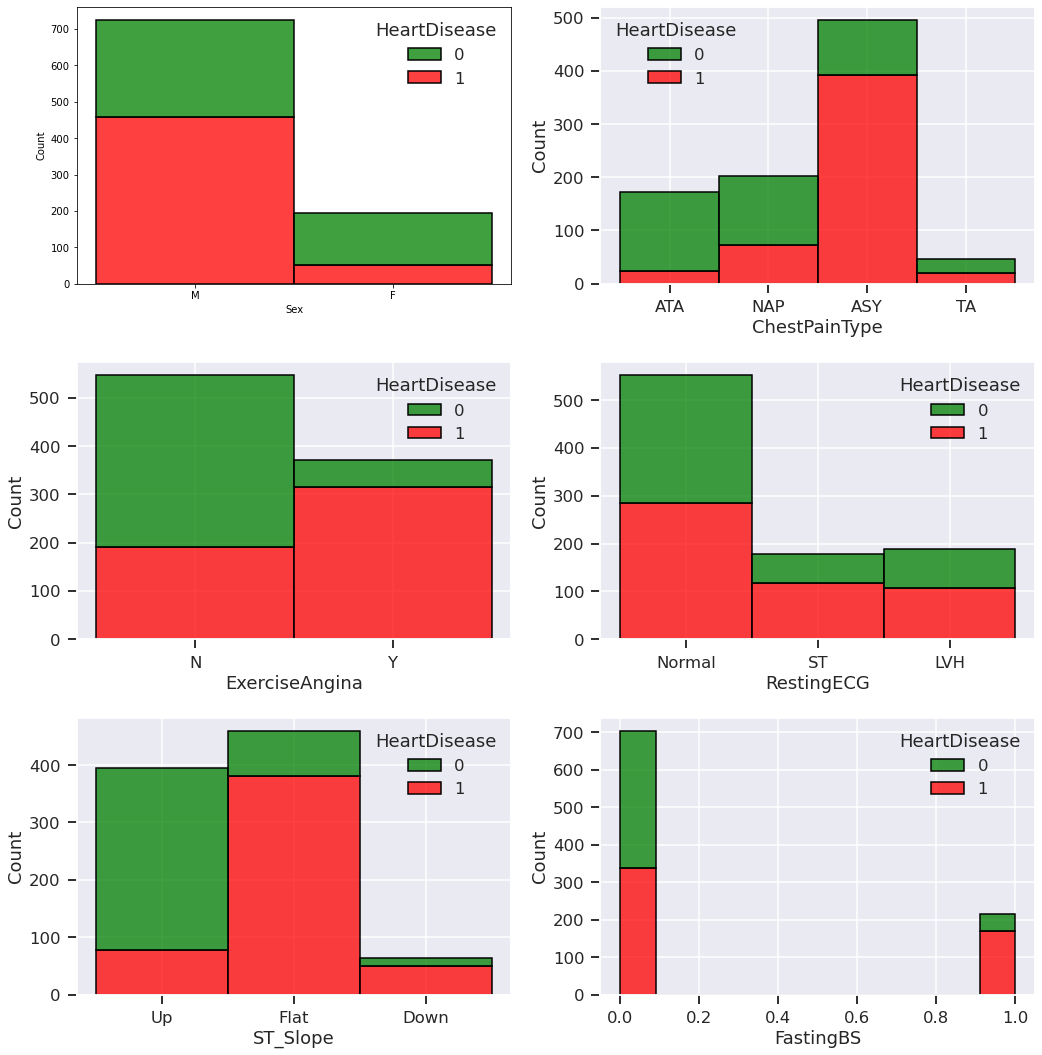

In [6]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ChestPainType', ylabel='Count')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ExerciseAngina', ylabel='Count')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='RestingECG', ylabel='Count')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ST_Slope', ylabel='Count')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='FastingBS', ylabel='Count')

In [7]:
def outliers(df_column):
    q75, q25 = np.percentile(df_column, [75 ,25]) 
    iqr = q75 - q25
    print('q75: ',q75)
    print('q25: ',q25)
    print('Inter Quartile Range: ',iqr)
    print('Outliers lie before', q25-1.8*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but I have used 1.8 for broader range

    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
    plt.tight_layout()
    plt.style.use('seaborn')
    sns.set_context('notebook')
    sns.histplot(data=df, x=df_column, hue="HeartDisease",multiple="stack",palette=oe)

q75:  140.0
q25:  120.0
Inter Quartile Range:  20.0
Outliers lie before 84.0 and beyond 176.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 23


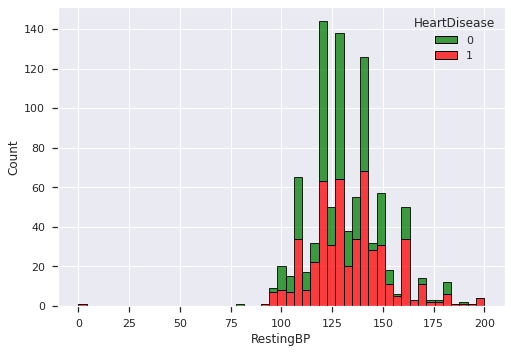

In [8]:
outliers(df['RestingBP']) 

In [12]:
# Como los outliers estan ligeramente sesgados hacia el extremo derecho, me los quedo y dropeo los del extremo izquierdo
df=df[df.RestingBP>=84]
len(df)

916

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


q75:  267.0
q25:  173.25
Inter Quartile Range:  93.75
Outliers lie before 4.5 and beyond 435.75
Number of Rows with Left Extreme Outliers: 172
Number of Rows with Right Extreme Outliers: 8


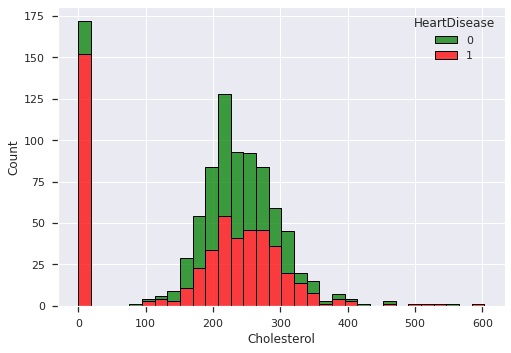

In [9]:
outliers(df['Cholesterol']) 
#Es imposible que una persona tenga 0 de colesterol xdddd
#Más adelante lidiaré con este problema

In [14]:
#De momento me quedo con los valores menores de 500 de colesterol
df=df[df.Cholesterol<=500]
df.head()
len(df)

912

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


q75:  156.0
q25:  120.0
Inter Quartile Range:  36.0
Outliers lie before 55.2 and beyond 220.8
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


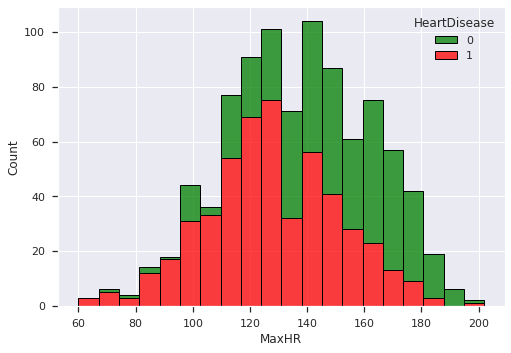

In [10]:
outliers(df['MaxHR'])

q75:  1.5
q25:  0.0
Inter Quartile Range:  1.5
Outliers lie before -2.7 and beyond 4.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 4


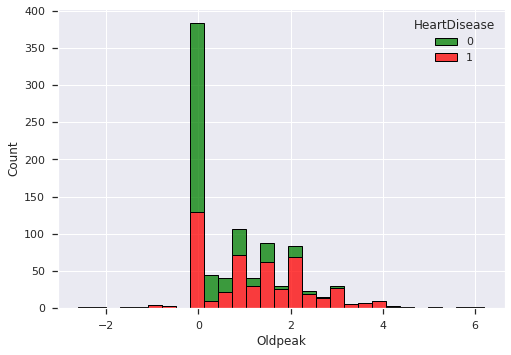

In [11]:
outliers(df['Oldpeak'])

In [16]:
df[df.Cholesterol==0].mean() #Intento de entender cómo se ven los datos cuando hay valores missing, como el colesterol a 0

Age              56.264706
RestingBP       130.735294
Cholesterol       0.000000
FastingBS         0.523529
MaxHR           121.682353
Oldpeak           0.814706
HeartDisease      0.888235
dtype: float64

In [17]:
df[df.Cholesterol>0].mean() #Aqui viendo si los que tienen el colesterol a 0 no se tienen en cuenta

Age              52.889488
RestingBP       133.055256
Cholesterol     242.970350
FastingBS         0.167116
MaxHR           140.247978
Oldpeak           0.902965
HeartDisease      0.475741
dtype: float64

In [18]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.6798245614035
Median:  222.5


In [22]:
df[df['Cholesterol']>0].Cholesterol.mean()

242.97035040431265

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,912.0,53.518640,9.425989,28.0,47.00,54.00,60.00,77.0
RestingBP,912.0,132.622807,17.943938,92.0,120.00,130.00,140.00,200.0
Cholesterol,912.0,197.679825,106.763321,0.0,173.75,222.50,266.25,491.0
FastingBS,912.0,0.233553,0.423323,0.0,0.00,0.00,0.00,1.0
MaxHR,912.0,136.787281,25.519987,60.0,120.00,138.00,156.00,202.0
Oldpeak,912.0,0.886513,1.068172,-2.6,0.00,0.55,1.50,6.2
HeartDisease,912.0,0.552632,0.497495,0.0,0.00,1.00,1.00,1.0


In [27]:
def OHE(dfcolumn):
    global df
    dfcolumn.nunique()
    len(df.columns)
    finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
    dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
    df=pd.concat([df,dummies],axis='columns')
    df.drop(columns=dfcolumn.name,axis=1,inplace=True) #Me cargo la columna original
    if(finallencol==len(df.columns)):
        print('Todo correcto') 
        print('')
    else:
        print('Error')
    return df

In [28]:
OHE(df['ChestPainType'])
OHE(df['Sex'])
OHE(df['RestingECG'])
OHE(df['ExerciseAngina'])
OHE(df['ST_Slope'])

Todo correcto

Todo correcto

Todo correcto

Todo correcto

Todo correcto



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,1,0,1,1,0
916,57,130,236,0,174,0.0,1,1,0,0,0,0,0,0,1,0


In [29]:
# Relleno los valores 0 del colesterol usando KNN-Imputation 
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol 

q75:  271.0
q25:  212.0
Inter Quartile Range:  59.0
Outliers lie before 105.8 and beyond 377.2
Number of Rows with Left Extreme Outliers: 3
Number of Rows with Right Extreme Outliers: 16


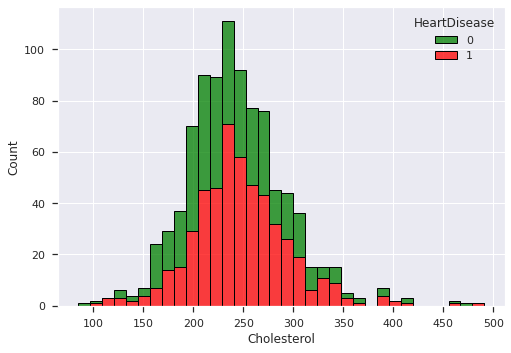

In [30]:
outliers(df['Cholesterol']) 